# Figure 1 and Supplementary Figure 2: 
# Random Forest Variable Importances

This notebook contains code for both Figure 1 (variable importances for 6 selected variables) and Supplementary Figure 2 (variable importances for all 20 variables). To produce the figures, choose either model definition in **select model** section below: 
- *model = 'random_forest_main_full_selected_vars_final'* for Figure 1
- *model = 'random_forest_main_full_full_vars_final'* for Supplementary Figure 2

# libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

linestyles = ['solid', 'dotted', 'dashed','dashdot']  
colors = ['b','r','k','#FFFF00','g','#808080','#56B4E9','#FF7F00']
markers = ['.','+','s']
sns.set_palette(colors)

%run _helper.ipynb
%run _feature_selection_class.ipynb

# parameters

In [4]:
input_path = ''
output_path = ''

# data

In [5]:
# load
data = pd.read_csv(input_path)
header = list(data)[1:-1]

In [6]:
dicc_features = get_full_variable_names(header)

# select model

In [7]:
################### SELECT MODEL ###################

model = 'random_forest_main_full_selected_vars_final' # Reduced Variable Set (Figure 1)
#model = 'random_forest_main_full_full_vars_final' # Full Variables Set (Supplementary Figure 2)

####################################################

# feature importances

In [8]:
# load model
final = load_obj('../obj/'+model)
clf = final.best_estimator_.named_steps['classify']
if 'selected' in model:
    features = final.best_estimator_.named_steps['featureselect'].columns
else:
    features = header

# get feature importances
feat_imp = get_feature_importances(clf, features)
f = [dicc_features[feat] for feat in feat_imp.features]    

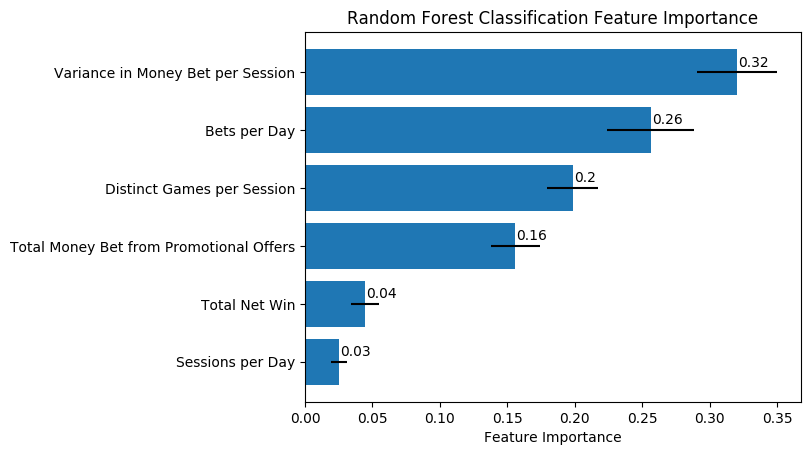

In [9]:
# Plot the feature importances of the forest
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(features))
var_imp = feat_imp.importances
error = feat_imp['std']
features = f

ax.barh(y_pos, var_imp, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest Classification Feature Importance')

for i, v in enumerate(var_imp):
    ax.text(v+0.001, i-0.1, str(np.round(v,2)))

# save fig
obj = '_'.join([model, 'variable_importance_fullnames' ])
plt.savefig(output_path + '.'.join([obj,'png']),bbox_inches="tight")
plt.show()